# THE SPARKS FOUNDATION GRIP TASK -2

## AUTHOR: MALLIKA ADAK

### DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP, JULY - 2021

#### TASK -2: PREDICTION USING UNSUPERVISED ML

OBJECTIVE: To predict the optimum number of clusters from the given iris dataset and represent it visually

Dataset: https://bit.ly/3kXTdox

### 1) Importing all the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

### 2) Reading the Data from the Source

In [2]:
dataset = pd.read_csv("D:\MALLIKA\Iris.csv")

In [3]:
dataset.drop(['Id'],axis=1,inplace=True)
print("Data set imported successfully")

dataset.head(10)

Data set imported successfully


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### 3) Familiarizing with Data

In [4]:
#Shape of dataframe
dataset.shape

(150, 5)

In [5]:
# Determining the different columns in the dataset
dataset.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
# Finding out different species in the column
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

There are three unique species in the data. So the model would be considered effective if it is able to find out the number of clusters as 3.

In [7]:
#Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# Describing the dataset by various parameters
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Evaluating correlation coefficient 
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### 4) Visualization of data

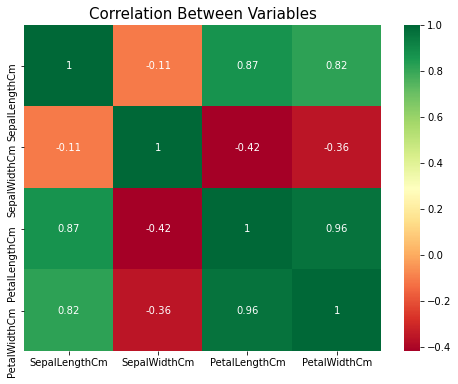

In [10]:
# plotting the heatmap of correlation matrix using seaborn
fig=plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation Between Variables',fontsize='15')
plt.show()

The variables which are correlating positively with the target are PetalWidthCm, PetalLengthCm etc


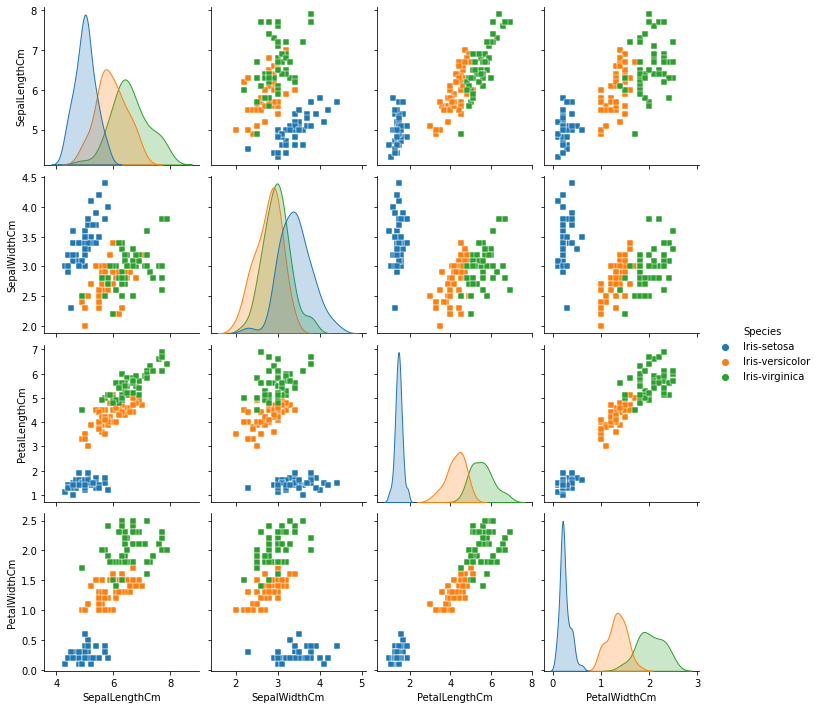

In [11]:
sns.pairplot(dataset, hue='Species', markers='s')
plt.show()

### 5) Finding the optimum number of clusters

The clustering algorithm going to be used in this notebook is **K-means Clustering algorithm.**

Kmeans clustering is used to partition data into K clusters in which observations belong to the cluster with closest centroid. The data points inside the similar cluster show lesser variations and more similarities and the data points belonging to different clusters show dissimilarites/variations.

**The elbow method** is one of the most popular ways to determine the number of clusters inside the data from cluster analysis. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster. For each number, within-cluster sum of square (wss) value is calculated and stored in a list. These value are then plotted against the range of number of clusters used before. The location of bend in the 2d plot indicates the appropiate number of clusters.

In [12]:
# Finding the optimum number of clusters using k-means

x = dataset.iloc[:,[0,1,2,3]].values

In [13]:
#importing Kmean model
from sklearn.cluster import KMeans
wcss=[]  # Within cluser sum of squares 

for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(x)
    # appending the WCSS to the list 
    #(kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.598978434287126,
 30.085307692307698,
 28.063274732725528]

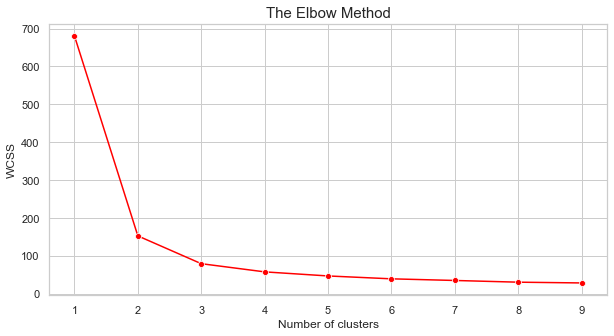

In [15]:
# Plotting the "within-cluster sum of square" into a line graph for observing 'The elbow'

plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.lineplot(range(1, 10), wcss,marker='o',color='red')
plt.title('The Elbow Method',fontsize='15')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### The elbow is formed at 3, so the optimum number of clusters is 3.

**From the graph above, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.**


### 6) Training the KMeans model on the dataset

In [16]:
# Fitting K-Means to the Dataset 
k = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [17]:
# Returns a label for each data point based on the number of clusters
y = k.fit_predict(x)

print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### 7) Visualizing the Model Clusters

In [18]:
#Values of Centroids of clusters
k.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

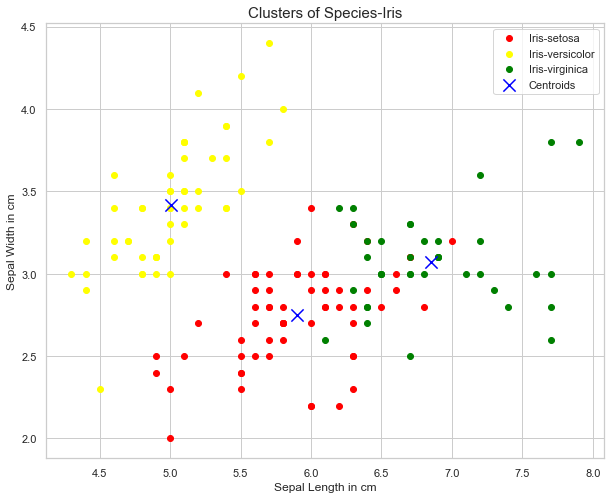

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(x[y==0,0], x[y==0,1], color='red', label='Iris-setosa')
plt.scatter(x[y==1,0], x[y==1,1], color='yellow', label='Iris-versicolor')
plt.scatter(x[y==2,0], x[y==2,1], color='green', label='Iris-virginica')
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],c='blue', s=150, label='Centroids',marker='x')
plt.title('Clusters of Species-Iris',fontsize='15')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.legend()
plt.show()

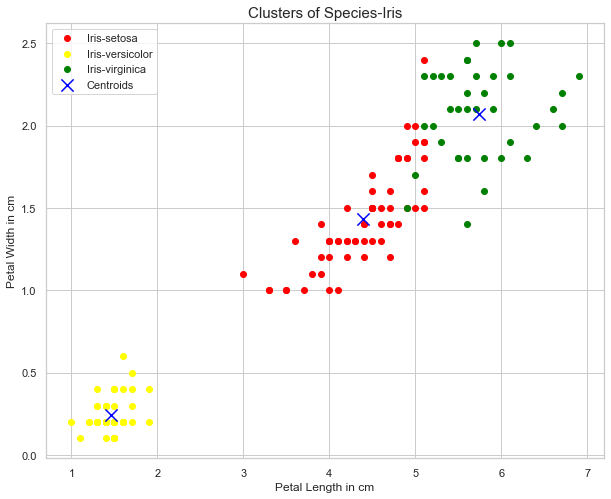

In [20]:
plt.figure(figsize=(10,8))
plt.scatter(x[y==0,2], x[y==0,3], color='red', label='Iris-setosa')
plt.scatter(x[y==1,2], x[y==1,3], color='yellow', label='Iris-versicolor')
plt.scatter(x[y==2,2], x[y==2,3], color='green', label='Iris-virginica')
plt.scatter(k.cluster_centers_[:,2],k.cluster_centers_[:,3], s=150,c='blue', label='Centroids',marker='x')
plt.title('Clusters of Species-Iris',fontsize='15')
plt.xlabel('Petal Length in cm')
plt.ylabel('Petal Width in cm')
plt.legend()
plt.show()

### CONCLUSION

Therefore, the optimal number of clusters are 3. Hence, we have understood the working of K-mean model on iris dataset and successfully carried out the prediction using Unsupervised Machine Learning.